In [1]:
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
#from matplotlib.patches import Ellipse
#from matplotlib.cm import ScalarMappable
#from matplotlib.patheffects import withStroke
#import matplotlib.ticker as ticker

import math
#import csv
#from math import pi
#import pandas as pd
#import glob
#import match 

#import seaborn as sns
#import statistics as stat

#from scipy.stats import kde #for the plot very soft
#from scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity

#from astropy.io import fits
from astropy.table import Table, unique, join, vstack, QTable, hstack
#from astropy.visualization import astropy_mpl_style
#from astropy.visualization import simple_norm
#from astropy.visualization import make_lupton_rgb
#from astropy.visualization import SqrtStretch
#from astropy.visualization import ZScaleInterval

#from astropy.nddata import Cutout2D
from astropy import units as u
from astropy import constants as Cons
from astropy.wcs import WCS
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
from astropy.coordinates import SkyCoord, Galactic, Angle


#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['xtick.direction'] = 'in'
#plt.rcParams['ytick.direction'] = 'in'
#
#plt.rcParams['axes.linewidth'] = 1.5
#plt.rcParams['xtick.major.size'] = 6
#plt.rcParams['xtick.minor.size'] = 3
#plt.rcParams['ytick.major.size'] = 6
#plt.rcParams['ytick.minor.size'] = 3

In [2]:
t_agn = Table.read('AGN_practico_topicos.dat', format='ascii')

t_agn['gr'] = t_agn['Mg'] - t_agn['Mr']

In [3]:
# Kewley+01--------------------------------------
# for NII/Ha
x1 = np.linspace(-2.5, 0.3)
y1 = (0.61/(x1 - 0.47)) +1.19
# for SII/Ha
x2 = np.linspace(-3.0, 0.1)
y2 = (0.72/(x2-0.32))+1.30
# for OI/Ha
x3 = np.linspace(-4,-0.8)
y3 = (0.73/(x3+0.59))+1.33

# Kewley+06 --------------------- 
# for OI/Ha diagrams
x_k1  = np.linspace(-1.1, 0.1)
y_k1 = 1.18*x_k1 + 1.30
# for SII/Ha
x_k2 = np.linspace(-0.325, 0.35)
y_k2 = 1.89 * x_k2 + 0.76

# Schawinski+07
x4 = np.linspace(-0.180, 1.5)
y4 = 1.05*x4 + 0.45

# Kauffman+03------------------------------------
xk = np.linspace(-1.3,-0.1)
yk = 0.61/(xk - 0.05)+1.3

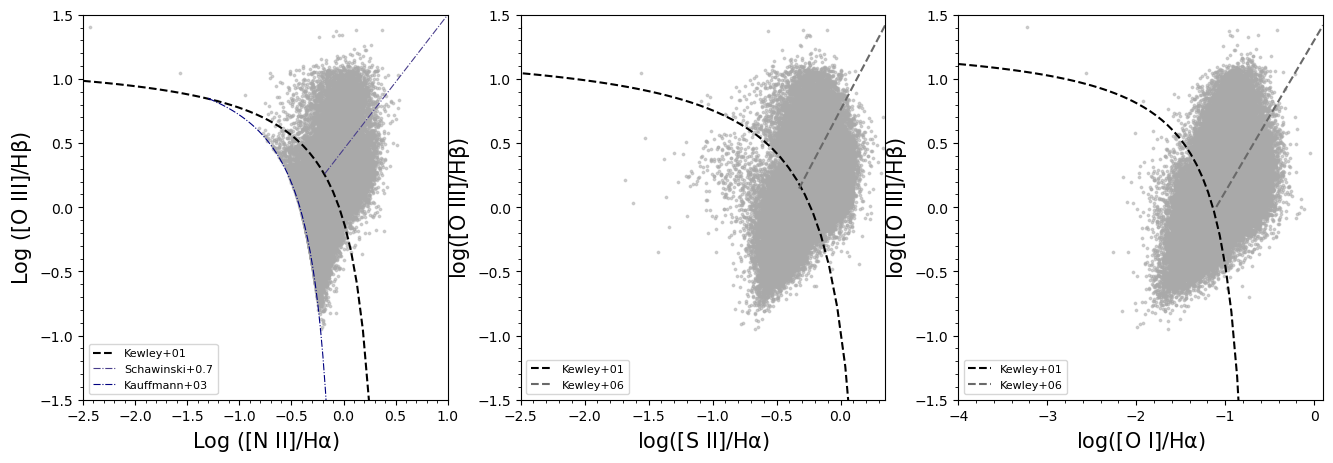

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5), sharey=False)

ax1.scatter(t_agn['bptx'], t_agn['bpty'], s=3, c='darkgray', alpha=0.5)
ax1.plot(x1,y1, color='black', linestyle='--', label='Kewley+01')
ax1.plot(x4,y4, color='darkslateblue', linestyle='-.', lw=0.8, label='Schawinski+0.7')
ax1.plot(xk,yk, color='navy', linestyle='-.', lw=0.8, label='Kauffmann+03')

ax1.set_xlabel(r'$\mathrm{Log\ ([N\ II]/H\alpha)}$', fontsize=15)
ax1.set_ylabel(r'$\mathrm{Log\ ([O\ III]/H\beta)}$', fontsize=15)
ax1.minorticks_on()
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(-2.5, 1)
ax1.legend(loc=3, fontsize=8)

#----------
ax2.scatter(t_agn['bptx2'], t_agn['bpty'], s=3, c='darkgray', alpha=0.5)
ax2.plot(x2,y2, color='black', linestyle='--', label='Kewley+01')
ax2.plot(x_k2,y_k2, color='dimgray', linestyle='--', label='Kewley+06')

ax2.minorticks_on()
ax2.set_xlim(-2.5,0.35)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'$\mathrm{log([S\ II]/H\alpha)}$', fontsize=15)
ax2.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax2.legend(loc=3, fontsize=8)

#-----------
ax3.scatter(t_agn['bptx3'], t_agn['bpty'], s=3, c='darkgray', alpha=0.5)
ax3.plot(x3,y3, color='black', linestyle='--', label='Kewley+01')
ax3.plot(x_k1,y_k1, color='dimgray', linestyle='--', label='Kewley+06')

ax3.minorticks_on()
ax3.set_xlim(-4,0.1)
ax3.set_ylim(-1.5, 1.5)
ax3.set_xlabel(r'$\mathrm{log([O\ I]/H\alpha)}$', fontsize=15)
ax3.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax3.legend(loc=3, fontsize=8)

In [64]:
vds1 = Table.read('voids_1.fits', format='fits')

vds1 = vds1[vds1['sfrmst']!=-99.99]

vds1_e = vds1[vds1['concind']>2.6]
vds1_l = vds1[vds1['concind']<=2.6]

#spec = Table.read('PARENT_SAMPLE_MPA-JHU.fits', format='fits')
vds2 = Table.read('voids_2.fits', format='fits')
vds2_e = vds2[vds2['concind']>2.6]
vds2_l = vds2[vds2['concind']<=2.6]


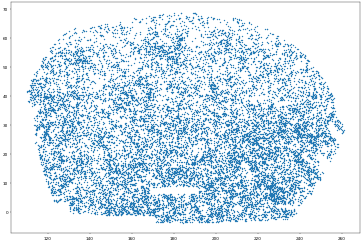

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,10), dpi=30)

ax.scatter(vds1['ra'], vds1['dec'], s=5)

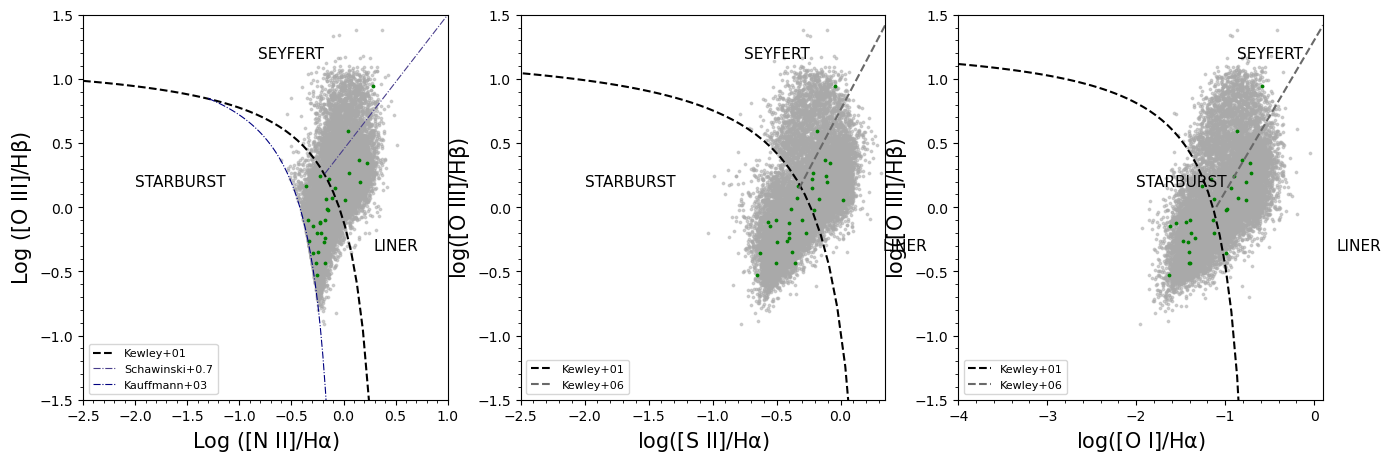

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5), sharey=False)

ax1.scatter(vds1['bptx'], vds1['bpty'], s=3, c='darkgray', alpha=0.5)
ax1.scatter(vds2['bptx'], vds2['bpty'], s=3, c='green', alpha=1)
ax1.plot(x1,y1, color='black', linestyle='--', label='Kewley+01')
ax1.plot(x4,y4, color='darkslateblue', linestyle='-.', lw=0.8, label='Schawinski+0.7')
ax1.plot(xk,yk, color='navy', linestyle='-.', lw=0.8, label='Kauffmann+03')

ax1.text(-2.0, 0.2, 'STARBURST', fontsize=11, ha='left', va='center')
ax1.text(-0.5, 1.2, 'SEYFERT', fontsize=11, ha='center', va='center')
ax1.text(0.5, -0.3, 'LINER', fontsize=11, ha='center', va='center')

ax1.set_xlabel(r'$\mathrm{Log\ ([N\ II]/H\alpha)}$', fontsize=15)
ax1.set_ylabel(r'$\mathrm{Log\ ([O\ III]/H\beta)}$', fontsize=15)
ax1.minorticks_on()
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(-2.5, 1)
ax1.legend(loc=3, fontsize=8)

#----------
ax2.scatter(vds1['bptx2'], vds1['bpty'], s=3, c='darkgray', alpha=0.5)
ax2.scatter(vds2['bptx2'], vds2['bpty'], s=3, c='green', alpha=1)
ax2.plot(x2,y2, color='black', linestyle='--', label='Kewley+01')
ax2.plot(x_k2,y_k2, color='dimgray', linestyle='--', label='Kewley+06')

ax2.text(-2.0, 0.2, 'STARBURST', fontsize=11, ha='left', va='center')
ax2.text(-0.5, 1.2, 'SEYFERT', fontsize=11, ha='center', va='center')
ax2.text(0.5, -0.3, 'LINER', fontsize=11, ha='center', va='center')

ax2.minorticks_on()
ax2.set_xlim(-2.5,0.35)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'$\mathrm{log([S\ II]/H\alpha)}$', fontsize=15)
ax2.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax2.legend(loc=3, fontsize=8)

#-----------
ax3.scatter(vds1['bptx3'], vds1['bpty'], s=3, c='darkgray', alpha=0.5)
ax3.scatter(vds2['bptx3'], vds2['bpty'], s=3, c='green', alpha=1)
ax3.plot(x3,y3, color='black', linestyle='--', label='Kewley+01')
ax3.plot(x_k1,y_k1, color='dimgray', linestyle='--', label='Kewley+06')

ax3.text(-2.0, 0.2, 'STARBURST', fontsize=11, ha='left', va='center')
ax3.text(-0.5, 1.2, 'SEYFERT', fontsize=11, ha='center', va='center')
ax3.text(0.5, -0.3, 'LINER', fontsize=11, ha='center', va='center')

ax3.minorticks_on()
ax3.set_xlim(-4,0.1)
ax3.set_ylim(-1.5, 1.5)
ax3.set_xlabel(r'$\mathrm{log([O\ I]/H\alpha)}$', fontsize=15)
ax3.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax3.legend(loc=3, fontsize=8)

(array([  6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   6.,  17.,  32.,
         49.,  65., 111.,  98., 147., 172., 223., 228., 269., 319., 299.,
        308., 344., 331., 283., 283., 280., 257., 170., 183., 170., 146.,
        131., 138., 104.,  93.,  83.,  59.,  41.,  21.,  15.,   2.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.02713   , 0.05426   , 0.08139   , 0.10852   ,
        0.13565001, 0.16278   , 0.18991001, 0.21704   , 0.24417001,
        0.27130002, 0.29843   , 0.32556   , 0.35269001, 0.37982002,
        0.40695   , 0.43408   , 0.46121001, 0.48834002, 0.51547003,
        0.54260004, 0.56972998, 0.59685999, 0.

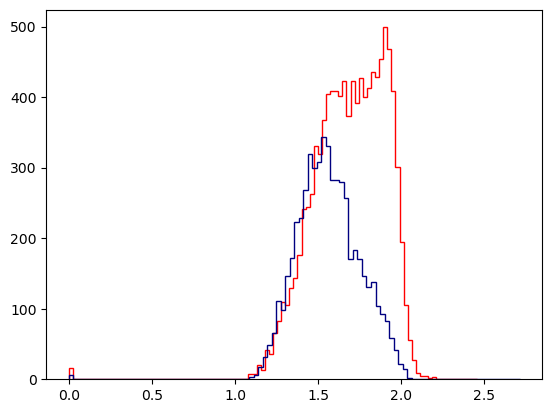

In [8]:
plt.hist(vds1_e['dn4000'], bins=100, histtype='step', color='red')
plt.hist(vds1_l['dn4000'], bins=100, histtype='step', color='navy')

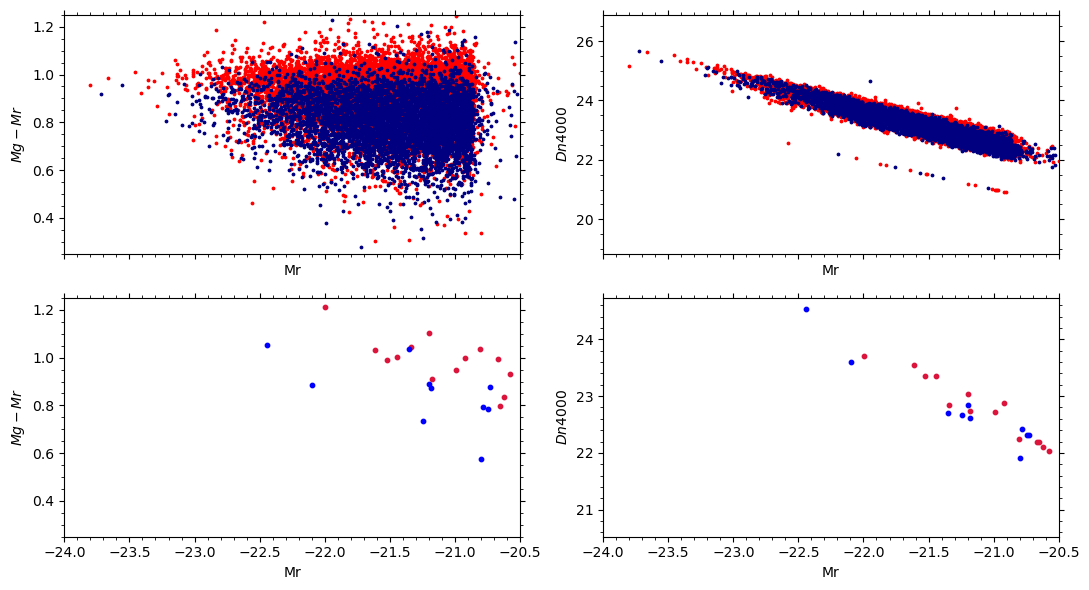

In [185]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(11,6), sharex=True)

# INNER
#ax1.scatter(vds1['Mr'], vds1['Mg'] - vds1['Mr'], s=3, c='gray', alpha=0.3)
ax1.scatter(vds1_e['Mr'], vds1_e['Mg']-vds1_e['Mr'], s=3, c='red')
ax1.scatter(vds1_l['Mr'], vds1_l['Mg']-vds1_l['Mr'], s=3, c='navy')
ax1.set_ylabel(r'$Mg - Mr$')
ax1.set_xlabel(r'Mr')
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', top=True)
ax1.tick_params(axis='y', which='both', right=True)
ax1.set_xlim(-24,-20.5)
ax1.set_ylim(0.25,1.25)

# MEDIA
ax2.scatter(vds1_e['Mr'], vds1_e['dn4000']-vds1_e['Mr'], s=3, c='red')
ax2.scatter(vds1_l['Mr'], vds1_l['dn4000']-vds1_l['Mr'], s=3, c='navy')
#ax2.scatter(t_agn['Mr'], (t_agn['Mg']-t_agn['Mr']))
#ax2.scatter(vds2['Mr'], vds2['Mg'] - vds2['Mr'], s=3, c='green', alpha=0.3)
#ax2.scatter(c_md['Mr'], c_md['gr'], s=10, c='darkcyan')
#ax2.set_ylim(0.1,1.0)
#ax2.set_xlim(-24.5,-16.5)
ax2.set_ylabel(r'$Dn4000$')
ax2.set_xlabel(r'Mr')
ax2.minorticks_on()
ax2.tick_params(axis='x', which='both', top=True)
ax2.tick_params(axis='y', which='both', right=True)


#----------------------------------------------

# INNER
#ax1.scatter(vds1['Mr'], vds1['Mg'] - vds1['Mr'], s=3, c='gray', alpha=0.3)
ax3.scatter(vds2_e['Mr'], vds2_e['Mg']-vds2_e['Mr'], s=10, c='crimson')
ax3.scatter(vds2_l['Mr'], vds2_l['Mg']-vds2_l['Mr'], s=10, c='BLUE')
ax3.set_ylabel(r'$Mg - Mr$')
ax3.set_xlabel(r'Mr')
ax3.minorticks_on()
ax3.tick_params(axis='x', which='both', top=True)
ax3.tick_params(axis='y', which='both', right=True)
ax3.set_xlim(-24,-20.5)
ax3.set_ylim(0.25,1.25)

# MEDIA
ax4.scatter(vds2_e['Mr'], vds2_e['dn4000']-vds2_e['Mr'], s=10, c='crimson')
ax4.scatter(vds2_l['Mr'], vds2_l['dn4000']-vds2_l['Mr'], s=10, c='blue')
#x42.scatter(t_agn['Mr'], (t_agn['Mg']-t_agn['Mr']))
#x42.scatter(vds2['Mr'], vds2['Mg'] - vds2['Mr'], s=3, c='green', alpha=0.3)
#x42.scatter(c_md['Mr'], c_md['gr'], s=10, c='darkcyan')
#x42.set_ylim(0.1,1.0)
#x42.set_xlim(-24.5,-16.5)
ax4.set_ylabel(r'$Dn4000$')
ax4.set_xlabel(r'Mr')
ax4.minorticks_on()
ax4.tick_params(axis='x', which='both', top=True)
ax4.tick_params(axis='y', which='both', right=True)


plt.tight_layout()

Text(0.5, 0, '$Mg-Mr$')

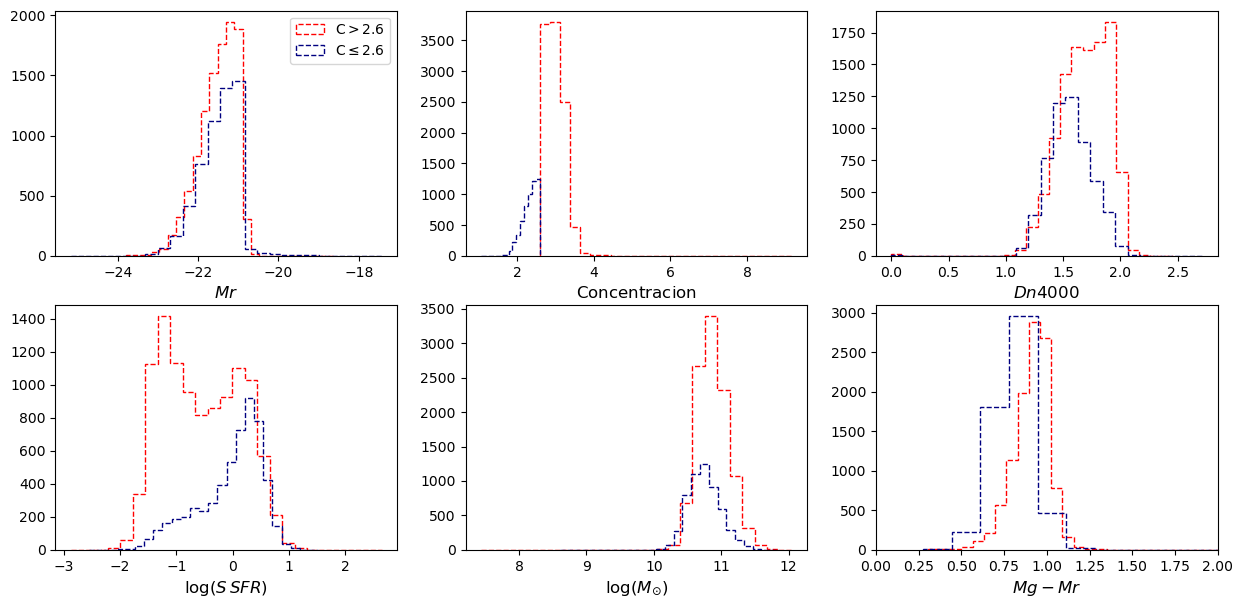

In [103]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))

h11 = ax1.hist(vds1_e['Mr'], bins=25, color='red', histtype='step', linestyle='--', label=r'C$> 2.6$')
h12 = ax1.hist(vds1_l['Mr'], bins=25, color='navy', histtype='step', linestyle='--', label=r'C$\leq 2.6$')
#h12 = ax1.hist(vds2['Mr'], bins=25, ec='black', histtype='step', linestyle='--')
ax1.set_xlabel(r'$Mr$', size=12)
ax1.legend()

h21 = ax2.hist(vds1_e['concind'], bins=25, color='red', histtype='step', linestyle='--')
h22 = ax2.hist(vds1_l['concind'], bins=15, color='navy', histtype='step', linestyle='--')
#h2 = ax2.hist(vds2['concind'], bins=15, ec='black', histtype='step', linestyle='--')
ax2.set_xlabel(r'$\mathrm{Concentracion}$', size=12)

h31 = ax3.hist(vds1_e['dn4000'], bins=25, color='red', histtype='step', linestyle='--')
h32 = ax3.hist(vds1_l['dn4000'], bins=25, color='navy', histtype='step', linestyle='--')
#h3 = ax3.hist(vds2['dn4000'], bins=25, ec='black', histtype='step', linestyle='--')
ax3.set_xlabel(r'$Dn4000$', size=12)

h41 = ax4.hist(vds1_e['sfr'], bins=25, color='red', histtype='step', linestyle='--')
h42 = ax4.hist(vds1_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
#h4 = ax4.hist(vds2_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
ax4.set_xlabel(r'$\log(S\,SFR)$', size=12)

h51 = ax5.hist(vds1_e['stmass'], bins=25, color='red', histtype='step', linestyle='--')
h52 = ax5.hist(vds1_l['stmass'], bins=25, color='navy', histtype='step', linestyle='--')
#h5 = ax5.hist(vds2['stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax5.set_xlabel(r'$\log(M_{\odot})$', size=12)


h61 = ax6.hist(vds1_e['Mg']-vds1_e['Mr'], bins=50, color='red', histtype='step', linestyle='--')
h62 = ax6.hist(vds1_l['Mg']-vds1_l['Mr'], bins=50, color='navy', histtype='step', linestyle='--')
#h6 = ax6.hist(vds2[stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax6.set_xlim(0,2)
ax6.set_xlabel(r'$Mg-Mr$', size=12)

Text(0.5, 0, '$Mg-Mr$')

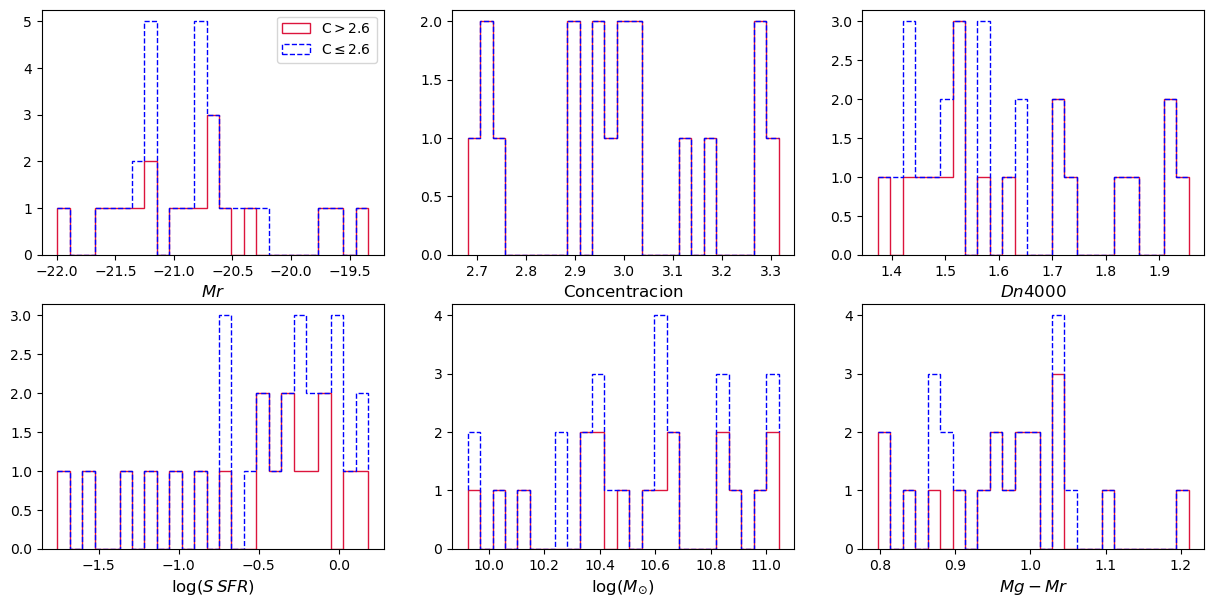

In [187]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))

h11 = ax1.hist(vds2_e['Mr'], bins=25, color='crimson', histtype='step', linestyle='-',  label=r'C$> 2.6$')
h12 = ax1.hist(vds2_l['Mr'], bins=h11[1], color='blue', histtype='step', linestyle='--', label=r'C$\leq 2.6$', bottom=h11[0])
#h12 = ax1.hist(vds2['Mr'], bins=25, ec='black', histtype='step', linestyle='--')
ax1.set_xlabel(r'$Mr$', size=12)
ax1.legend()

h21 = ax2.hist(vds2_e['concind'], bins=25, color='crimson', histtype='step', linestyle='-')
h22 = ax2.hist(vds2_l['concind'], bins=h21[1], color='blue', histtype='step', linestyle='--', bottom=h21[0])
#h2 = ax2.hist(vds2['concind'], bins=15, ec='black', histtype='step', linestyle='--')
ax2.set_xlabel(r'$\mathrm{Concentracion}$', size=12)

h31 = ax3.hist(vds2_e['dn4000'], bins=25, color='crimson', histtype='step', linestyle='-')
h32 = ax3.hist(vds2_l['dn4000'], bins=h31[1], color='blue', histtype='step', linestyle='--', bottom=h31[0])
#h3 = ax3.hist(vds2['dn4000'], bins=25, ec='black', histtype='step', linestyle='--')
ax3.set_xlabel(r'$Dn4000$', size=12)

h41 = ax4.hist(vds2_e['sfr'], bins=25, color='crimson', histtype='step', linestyle='-')
h42 = ax4.hist(vds2_l['sfr'], bins=h41[1], color='blue', histtype='step', linestyle='--', bottom=h41[0])
#h4 = ax4.hist(vds2_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
ax4.set_xlabel(r'$\log(S\,SFR)$', size=12)

h51 = ax5.hist(vds2_e['stmass'], bins=25, color='crimson', histtype='step', linestyle='-')
h52 = ax5.hist(vds2_l['stmass'], bins=h51[1], color='blue', histtype='step', linestyle='--', bottom=h51[0])
#h5 = ax5.hist(vds2['stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax5.set_xlabel(r'$\log(M_{\odot})$', size=12)


h61 = ax6.hist(vds2_e['Mg']-vds2_e['Mr'], bins=25, color='crimson', histtype='step', linestyle='-')
h62 = ax6.hist(vds2_l['Mg']-vds2_l['Mr'], bins=h61[1], color='blue', histtype='step', linestyle='--', bottom=h61[0])
#h6 = ax6.hist(vds2[stmass'], bins=25, ec='black', histtype='step', linestyle='--')
#ax6.set_xlim(0,2)
ax6.set_xlabel(r'$Mg-Mr$', size=12)

Text(0.5, 0, '$Mg-Mr$')

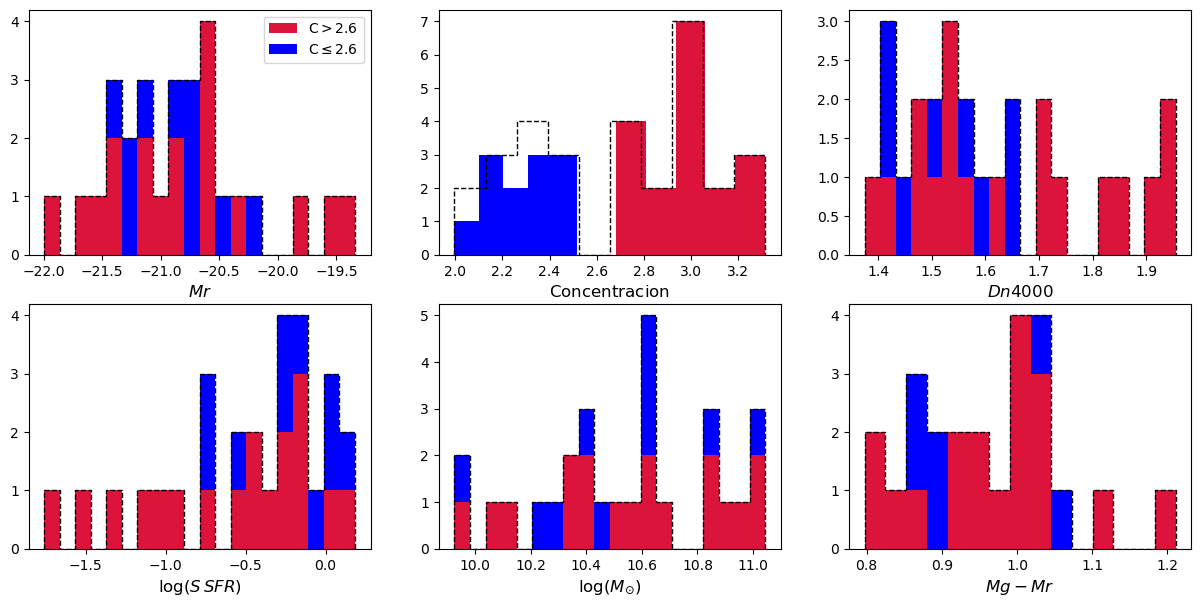

In [171]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))

h11 = ax1.hist(vds2_e['Mr'], bins=20, color='crimson', histtype='stepfilled', linestyle='--', label=r'C$> 2.6$')
h12 = ax1.hist(vds2_l['Mr'], bins=h11[1], color='blue', histtype='stepfilled', linestyle='--', label=r'C$\leq 2.6$', bottom=h11[0])
h1 = ax1.hist(vds2['Mr'], bins=h11[1], ec='black', histtype='step', linestyle='--')
ax1.set_xlabel(r'$Mr$', size=12)
ax1.legend()


h21 = ax2.hist(vds2_e['concind'], bins=5, color='crimson', histtype='stepfilled', linestyle='--')
h22 = ax2.hist(vds2_l['concind'], bins=5, color='blue', histtype='stepfilled', linestyle='--')
h2 = ax2.hist(vds2['concind'], bins=10, ec='black', histtype='step', linestyle='--')
ax2.set_xlabel(r'$\mathrm{Concentracion}$', size=12)
#ax2.set_xlim(int(min(vds2_l['concind'])-1), int(max(vds2_e['concind'])+1))

h31 = ax3.hist(vds2_e['dn4000'], bins=20, color='crimson', histtype='stepfilled', linestyle='--')
h32 = ax3.hist(vds2_l['dn4000'], bins=h31[1], color='blue', histtype='stepfilled', linestyle='--', bottom=h31[0])
h3 = ax3.hist(vds2['dn4000'], bins=h31[1], ec='black', histtype='step', linestyle='--')
ax3.set_xlabel(r'$Dn4000$', size=12)

h41 = ax4.hist(vds2_e['sfr'], bins=20, color='crimson', histtype='stepfilled', linestyle='--')
h42 = ax4.hist(vds2_l['sfr'], bins=h41[1], color='blue', histtype='stepfilled', linestyle='--', bottom=h41[0])
h4 = ax4.hist(vds2['sfr'], bins=h41[1], color='black', histtype='step', linestyle='--')
ax4.set_xlabel(r'$\log(S\,SFR)$', size=12)

h51 = ax5.hist(vds2_e['stmass'], bins=20, color='crimson', histtype='stepfilled', linestyle='--')
h52 = ax5.hist(vds2_l['stmass'], bins=h51[1], color='blue', histtype='stepfilled', linestyle='--', bottom=h51[0])
h5 = ax5.hist(vds2['stmass'], bins=h51[1], ec='black', histtype='step', linestyle='--')
ax5.set_xlabel(r'$\log(M_{\odot})$', size=12)


h61 = ax6.hist(vds2_e['Mg']-vds2_e['Mr'], bins=15, color='crimson', histtype='stepfilled', linestyle='--')
h62 = ax6.hist(vds2_l['Mg']-vds2_l['Mr'], bins=h61[1], color='blue', histtype='stepfilled', linestyle='--', bottom=h61[0])
h6 = ax6.hist(vds2['Mg']-vds2['Mr'], bins=h61[1], ec='black', histtype='step', linestyle='--')
#ax6.set_xlim(0.4,1.6)
ax6.set_xlabel(r'$Mg-Mr$', size=12)

In [115]:
len(vds2_e)
max(vds2_l['concind'])

2.5145

In [97]:
len(vds2_l)

12

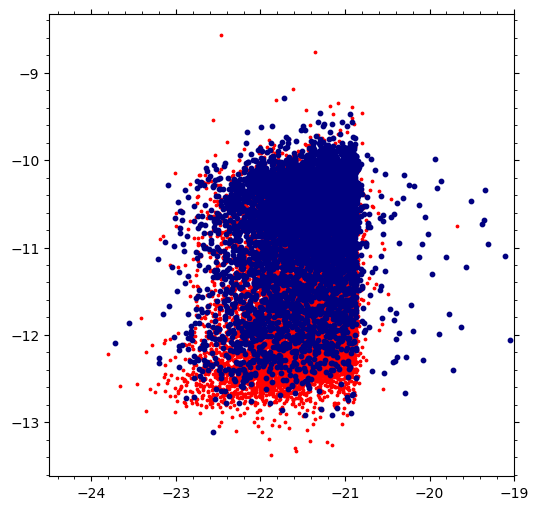

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ax.scatter(vds1_e['Mr'], vds1_e['sfrmst'], s=3, c='red')
ax.scatter(vds1_l['Mr'], vds1_l['sfrmst'], s=10, c='navy')
ax.set_xlim(-24.5, -19)
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True)
ax.tick_params(axis='y', which='both', right=True)

In [30]:
t_agn.colnames

['PLATE',
 'MJD',
 'FIB',
 'ra',
 'dec',
 'z',
 'Mu',
 'Mg',
 'Mr',
 'Mi',
 'Mz',
 'concind',
 'stmass',
 'sfrmst',
 'sfr',
 'dn4000',
 'bpty',
 'bptx',
 'bptx2',
 'bptx3',
 'SN_Hbeta',
 'SN_OIII',
 'SN_OI',
 'SN_Halpha',
 'SN_NII',
 'SN_SII6717',
 'SN_SII6731',
 'agn_type',
 'LumOIII',
 'logMBH',
 'R',
 'gr']

In [32]:
t_agn

PLATE,MJD,FIB,ra,dec,z,Mu,Mg,Mr,Mi,Mz,concind,stmass,sfrmst,sfr,dn4000,bpty,bptx,bptx2,bptx3,SN_Hbeta,SN_OIII,SN_OI,SN_Halpha,SN_NII,SN_SII6717,SN_SII6731,agn_type,LumOIII,logMBH,R,gr
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
348,51671,1,249.639518,-0.896539,0.05917,-17.08689,-18.70838,-19.65643,-20.07301,-20.3064,2.94789,10.1229,-11.52136,-1.3445,1.7508,0.0769,-0.2297,-0.1513,-0.7399,3.7274,3.9463,2.1282,8.5564,5.768,4.5135,3.058,100,4.676236889984032,7.200187175637402,-2.5239502856533704,0.9480500000000021
300,51943,98,207.689028,-0.78399,0.08276,-18.29077,-19.6594,-20.37956,-20.78272,-21.01888,3.06824,10.2774,-10.31623,0.0123,1.3682,0.2454,-0.1193,-0.2746,-0.8831,15.1725,22.939,10.5345,55.2827,45.6349,16.3328,14.0378,100,6.497014716987304,6.837428291019724,-0.3404135740324197,0.7201599999999999
290,51941,205,188.704666,-1.076599,0.09154,-18.54361,-20.57249,-21.54879,-21.99173,-22.30006,2.80844,10.9662,-12.57243,-1.5792,1.8955,0.2681,-0.1444,-0.2801,-0.8495,4.5731,6.6653,2.2034,14.1685,10.3489,3.3938,3.4811,100,6.184879492582372,7.807108494342523,-1.622229001760151,0.9763000000000019
341,51690,604,200.906606,-1.216121,0.08267,-18.77055,-20.81231,-21.8261,-22.26797,-22.59549,3.06262,11.1029,-12.31072,-1.1865,2.0009,0.1109,-0.102,-0.1078,-0.7724,5.9193,7.866,4.3001,18.2434,16.592,8.8327,5.4491,100,6.177342681169461,8.390397313056129,-2.213054631886668,1.0137900000000002
298,51955,134,203.589698,-0.74168,0.02185,-16.51868,-17.88537,-18.54792,-18.79617,-18.88918,1.99449,9.3757,-10.25991,-0.8348,1.4504,0.0775,-0.4002,-0.1649,-0.8631,3.5774,4.0824,2.4864,16.7146,7.5046,4.3587,3.3738,100,4.234201294012309,5.935917752973648,-1.7017164589613385,0.6625499999999995
346,51693,234,243.583196,-0.031564,0.03081,-17.95042,-19.57499,-20.53857,-20.95013,-21.22617,2.72719,10.4333,-11.79363,-1.2897,1.9223,0.4155,-0.0237,-0.1206,-0.8058,4.1811,9.4119,2.3625,13.4657,12.8771,6.5801,4.0784,100,5.322474014807171,7.291575386625526,-1.969101371818355,0.9635800000000003
348,51671,237,247.86385,-0.031442,0.05831,-17.80038,-19.59834,-20.55922,-20.96491,-21.25167,3.3296,10.4999,-11.81759,-1.2501,1.8649,0.3564,-0.1069,-0.2363,-0.7767,3.9523,8.0965,2.94,12.0608,11.2415,6.0228,3.4439,100,5.729869148327665,7.58089579725347,-1.8510266489258056,0.9608799999999995
348,51671,560,249.191923,0.324507,0.07306,-19.11834,-20.77538,-21.67158,-22.1335,-22.45665,3.01756,11.0025,-10.78791,0.2589,1.588,-0.0104,-0.1067,-0.217,-1.0146,11.0245,9.1753,6.1882,47.8413,37.9158,18.2237,13.9935,100,6.576281288462215,7.932580141795477,-1.3562988533332625,0.8962000000000003
343,51692,424,238.603061,0.220942,0.09375,-17.77895,-19.42106,-20.38638,-20.83149,-21.23067,2.38598,10.5445,-11.18333,-0.5589,1.4964,0.4802,-0.6787,-0.509,-0.8862,3.9802,9.793,2.6003,17.0907,4.5534,2.3091,3.3345,100,6.284651596525346,6.418019067876089,-0.13336747135074312,0.9653199999999984
